In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
import sys

Mounted at /content/drive


In [3]:
import glob
cyst = glob.glob("/content/drive/MyDrive/Project/Potato/Potato___Early_blight/*.JPG")
normal = glob.glob("/content/drive/MyDrive/Project/Potato/Potato___healthy/*.JPG")
stone = glob.glob("/content/drive/MyDrive/Project/Potato/Potato___Late_blight/*.JPG")

In [4]:
print(len(cyst),len(normal),len(stone))

1000 1000 1000


In [5]:
LR = 0.001
EPOCHS = 2
all_LEN=len(normal)
BATCH_SIZE = 10

INP_SIZE = (705,569,3)

In [6]:
import cv2
import os, glob
import numpy as np
import seaborn as sns
from imutils import paths
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
!pip install tensorflow
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet101, Xception,VGG19,InceptionResNetV2,ResNet50V2,InceptionV3,MobileNetV2,MobileNet
from tensorflow.keras.layers import Input, Dense, Flatten, AveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D,Activation,add

In [7]:
def create_data(dir_name):
    temp_data = []
    img_list = glob.glob(dir_name + '/*')
    print(len(img_list))
    for img in img_list[:]:
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (124, 124))
        temp_data.append(image)
    return temp_data

data = []
labels = []

cyst_dir = '/content/drive/MyDrive/Project/Potato/Potato___Early_blight'
normal_dir = '/content/drive/MyDrive/Project/Potato/Potato___healthy'
stone_dir = '/content/drive/MyDrive/Project/Potato/Potato___Late_blight'

In [8]:
data.extend(create_data(cyst_dir))
data.extend(create_data(normal_dir))
data.extend(create_data(stone_dir))

1000
1000
1000


In [9]:
labels.extend([0]*len(cyst))
labels.extend([1]*len(normal))
labels.extend([2]*len(stone))
#labels.extend([3] * all_LEN)

In [10]:
print("Length of cyst:", len(cyst))
print("Length of normal:", len(normal))
print("Length of stone:", len(stone))
print("Value of all_LEN:", all_LEN)

Length of cyst: 1000
Length of normal: 1000
Length of stone: 1000
Value of all_LEN: 1000


In [11]:
print(len(labels),len(data))

3000 3000


In [12]:
data = np.array(data)
labels = np.array(labels)

print(data.shape)
print(labels.shape)

(3000, 124, 124, 3)
(3000,)


In [13]:
cyst_sample = glob.glob("/content/drive/MyDrive/Project/Potato/Potato___Early_blight/*")[40:44]
normal_sample = glob.glob("/content/drive/MyDrive/Project/Potato/Potato___healthy/*")[0:4]
stone_sample = glob.glob("/content/drive/MyDrive/Project/Potato/Potato___Late_blight/*")[40:44]

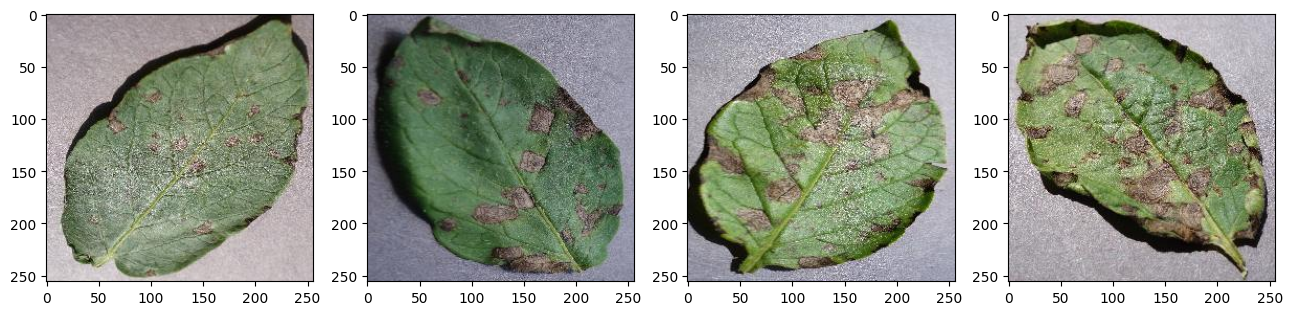

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math


plt.figure(figsize=(20, 10))
columns = 5
num_images = len(cyst_sample)
num_rows = math.ceil(num_images / columns)

for i, image in enumerate(cyst_sample):
    plt.subplot(num_rows, columns, i + 1)
    plt.imshow(mpimg.imread(image))

plt.show()

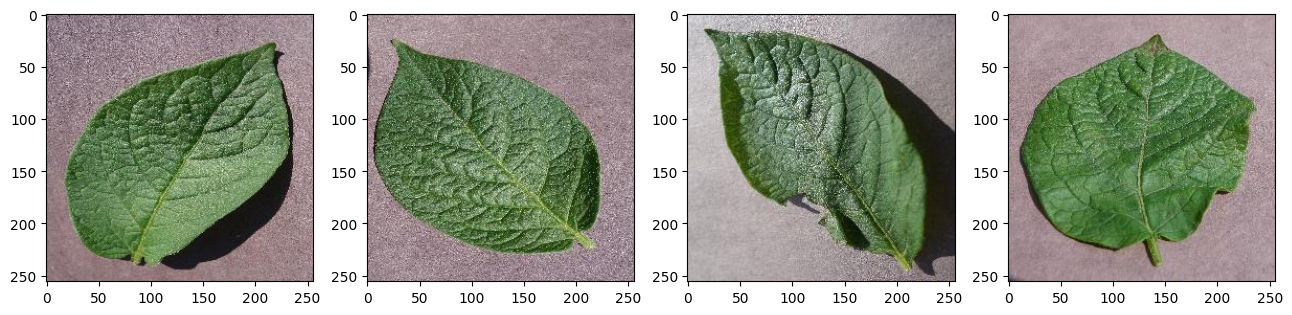

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math


plt.figure(figsize=(20, 10))
columns = 5
num_images = len(normal_sample)
num_rows = math.ceil(num_images / columns)

for i, image in enumerate(normal_sample):
    plt.subplot(num_rows, columns, i + 1)
    plt.imshow(mpimg.imread(image))

plt.show()

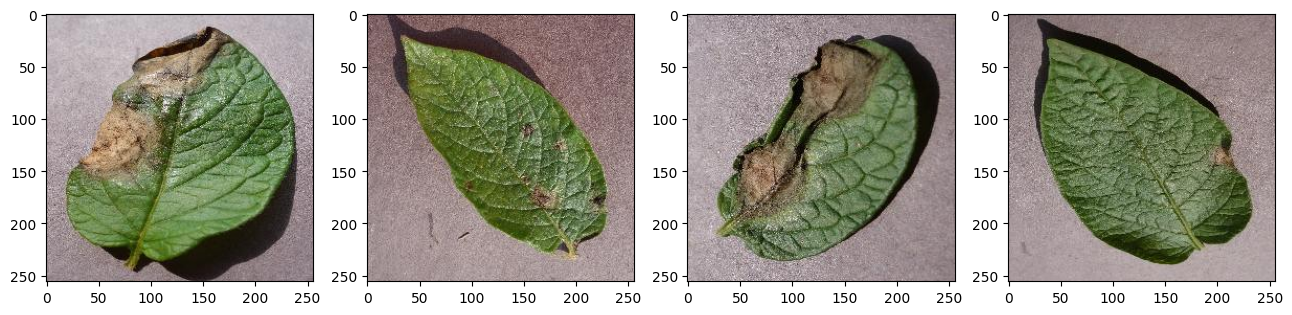

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math


plt.figure(figsize=(20, 10))
columns = 5
num_images = len(stone_sample)
num_rows = math.ceil(num_images / columns)

for i, image in enumerate(stone_sample):
    plt.subplot(num_rows, columns, i + 1)
    plt.imshow(mpimg.imread(image))

plt.show()

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
IMG_DIM = (124, 124)
from keras.preprocessing import image
samples = glob.glob(stone_dir + '/*')
train_imgs = [image.img_to_array(image.load_img(img, target_size=IMG_DIM)) for img in samples]

In [19]:
train_labels = ["Disease" for fn in train_imgs]

In [20]:
train_imgs = np.array(train_imgs)

Labels: ['Disease', 'Disease', 'Disease', 'Disease', 'Disease']


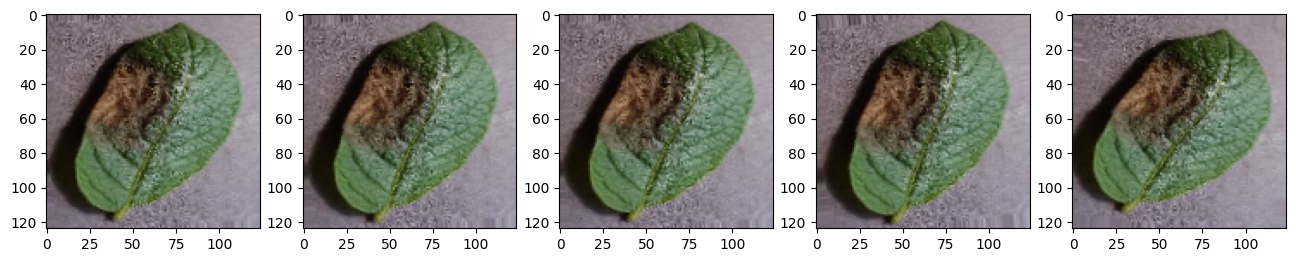

In [21]:
img_id = 0
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

In [22]:
#lb = LabelBinarizer()
#labels = lb.fit_transform(labels)
#labels = to_categorical(labels)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

(x_train, x_test, y_train, y_test) = train_test_split(
    data,
    labels,
    test_size=0.20,
    stratify=labels,
    random_state=42
)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest"
)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 124, 124, 3)
(2400, 3)
(600, 124, 124, 3)
(600, 3)


In [23]:
def display_history(history_):
    fig, ax = plt.subplots(1,2, figsize=(12, 3))
    ax[0].plot(history_.history['loss'], color='b', label="training_loss")
    ax[0].plot(history_.history['val_loss'], color='r', label="validation_loss",axes =ax[0])
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    legend = ax[0].legend(loc='best', shadow=True)
    ax[1].plot(history_.history['accuracy'], color='b', label="training_accuracy")
    ax[1].plot(history_.history['val_accuracy'], color='r',label="validation_accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    legend = ax[1].legend(loc='best', shadow=True)

def plot_metrices(model_):
    plt.figure()
    ax = plt.subplot()
    ax.set_title('Confusion Matrix')
    pred = model_.predict(x_test, batch_size = BATCH_SIZE)
    pred = np.argmax(pred, axis = 1)
    cm = confusion_matrix(y_test.argmax(axis = 1), pred)
    classes=['cyst', 'normal', 'stone']
    sns.heatmap(cm, annot = True, xticklabels = classes, yticklabels = classes, cmap = 'Reds')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show

    print(classification_report(y_test.argmax(axis = 1), pred))
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

    print("ACC: {:.4f}".format(acc))
    print("Sensitivity: {:.4f}".format(sensitivity))
    print("Specificity: {:.4f}".format(specificity))

In [24]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(124, 124, 3)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((3, 3), padding='same'))
model.add(MaxPooling2D((3, 3), padding='same'))
#model.add(MaxPooling2D((3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
#model.add(MaxPooling2D((2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 64)      102464    
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 38, 38, 64)        0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 64)        2

In [25]:
import pandas as pd
table=pd.DataFrame(columns=["Layer Name","Layer Type","Shape","Param"])
for layer in model.layers:
    table = table.append({"Layer Name":layer.name, "Layer Type": layer.__class__.__name__,"Shape":layer.output_shape,"Param":layer.count_params()}, ignore_index=True)

<ipython-input-25-a4b7ab488ef5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({"Layer Name":layer.name, "Layer Type": layer.__class__.__name__,"Shape":layer.output_shape,"Param":layer.count_params()}, ignore_index=True)
<ipython-input-25-a4b7ab488ef5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({"Layer Name":layer.name, "Layer Type": layer.__class__.__name__,"Shape":layer.output_shape,"Param":layer.count_params()}, ignore_index=True)
<ipython-input-25-a4b7ab488ef5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({"Layer Name":layer.name, "Layer Type": layer.__class__.__name__,"Shape":layer.output_shape,"Param":layer.count_params()}, ignore_index=True)
<

In [27]:
table.head()

,Layer Name,Layer Type,Shape,Param
0,conv2d,Conv2D,"(None, 120, 120, 64)",4864
1,conv2d_1,Conv2D,"(None, 116, 116, 64)",102464
2,conv2d_2,Conv2D,"(None, 112, 112, 64)",102464
3,max_pooling2d,MaxPooling2D,"(None, 38, 38, 64)",0
4,max_pooling2d_1,MaxPooling2D,"(None, 13, 13, 64)",0


In [28]:
import cv2
import numpy as np

x_train_resized = [cv2.resize(image, (124, 124)) for image in x_train]
x_test_resized = [cv2.resize(image, (124, 124)) for image in x_test]

x_train_resized = np.array(x_train_resized)
x_test_resized = np.array(x_test_resized)

history = model.fit(
    trainAug.flow(x_train_resized, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=len(x_train_resized) // BATCH_SIZE,
    validation_data=(x_test_resized, y_test),
    validation_steps=len(x_test_resized) // BATCH_SIZE,
    epochs=30


)

Epoch 1/30
240/240 [==============================] - 30s 65ms/step - loss: 0.6911 - accuracy: 0.7025 - val_loss: 3.7029 - val_accuracy: 0.3333
Epoch 2/30
240/240 [==============================] - 16s 68ms/step - loss: 0.4611 - accuracy: 0.8292 - val_loss: 0.3422 - val_accuracy: 0.8817
Epoch 3/30
240/240 [==============================] - 16s 67ms/step - loss: 0.3296 - accuracy: 0.8788 - val_loss: 1.8457 - val_accuracy: 0.5117
Epoch 4/30
240/240 [==============================] - 16s 67ms/step - loss: 0.3217 - accuracy: 0.8875 - val_loss: 0.3925 - val_accuracy: 0.8483
Epoch 5/30
240/240 [==============================] - 16s 66ms/step - loss: 0.2964 - accuracy: 0.8917 - val_loss: 3.2032 - val_accuracy: 0.6217
Epoch 6/30
240/240 [==============================] - 16s 66ms/step - loss: 0.3073 - accuracy: 0.8879 - val_loss: 0.3400 - val_accuracy: 0.8600
Epoch 7/30
240/240 [==============================] - 16s 66ms/step - loss: 0.2393 - accuracy: 0.9279 - val_loss: 0.4714 - val_accuracy:

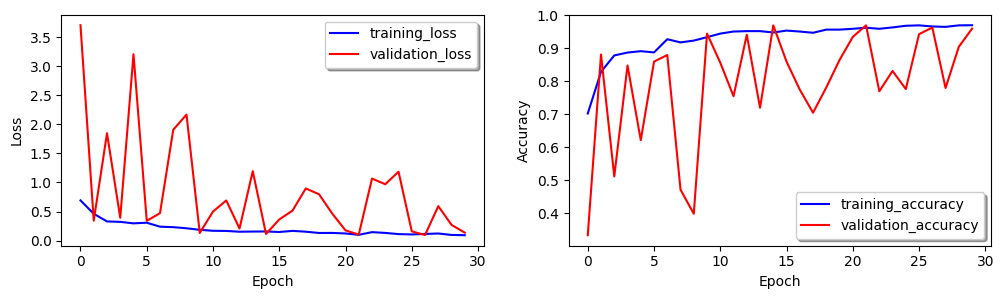

In [29]:
display_history(history)

60/60 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       200
           1       0.95      1.00      0.98       200
           2       0.94      0.95      0.94       200

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

ACC: 0.6433
Sensitivity: 0.9947
Specificity: 1.0000


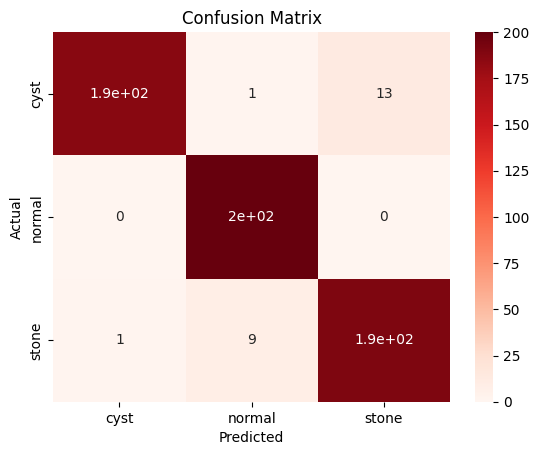

In [30]:
plot_metrices(model)

19/19 [==============================] - 2s 48ms/step
1800


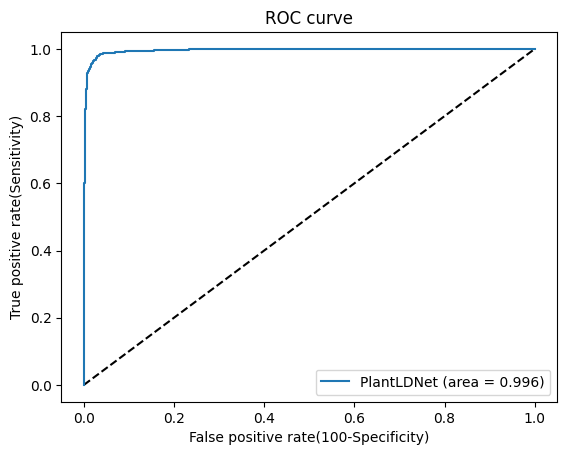

In [31]:
import sklearn.metrics
def plot_roc(model_, name):
    plt.figure()
    ax = plt.subplot()
    ax.set_title('ROC Curve')
    pred = model_.predict(x_test).ravel()
    print(pred.size)
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test.ravel(), pred)
    ac = sklearn.metrics.auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='{} (area = {:.3f})'.format(name, ac))
    plt.xlabel('False positive rate(100-Specificity)')
    plt.ylabel('True positive rate(Sensitivity)')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show
plot_roc(model,"PlantLDNet")

In [32]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Create a multiclass dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Choose one class as the positive class (e.g., class 1) and the rest as the negative class (e.g., class 0)
positive_class = 1
y_binary = np.where(y == positive_class, 1, 0)

# Define the model
model = DecisionTreeClassifier()

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Evaluate the model using ROC AUC scoring for binary classification
scores = cross_val_score(model, X, y_binary, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.775


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have already defined X and y

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()

kf = KFold(n_splits=2, shuffle=True)
for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Reshape the data if it has more than 2 dimensions
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    # Train the DecisionTreeClassifier
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    scores = model.score(X_test, y_test)
    print(f'Score for fold {fold_index}: {scores * 100}%')


TRAIN: [   0    6    9 ... 9992 9995 9997] TEST: [   1    2    3 ... 9996 9998 9999]
Score for fold 0: 99.11999999999999%
TRAIN: [   1    2    3 ... 9996 9998 9999] TEST: [   0    6    9 ... 9992 9995 9997]
Score for fold 1: 99.02%


In [34]:
# Sample values for acc_per_fold and loss_per_fold (replace with your actual values)
acc_per_fold = [80.0, 85.0, 75.0, 90.0]
loss_per_fold = [0.1, 0.15, 0.2, 0.1]

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.1 - Accuracy: 80.0%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.15 - Accuracy: 85.0%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.2 - Accuracy: 75.0%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.1 - Accuracy: 90.0%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 82.5 (+- 5.5901699437494745)
> Loss: 0.1375
------------------------------------------------------------------------


In [35]:
# Install the 'keract' package
!pip install keract

# Import necessary libraries
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keract import display_activations, get_activations
import matplotlib.pyplot as plt

# Load a pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=True)

# Load an image
img_path = "/content/drive/MyDrive/Project/Potato/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG"
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = preprocess_input(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# Get activations for all layers
activations = get_activations(model, img)

# Display activations for a few layers (adjust layer_names as needed)
layer_names = ["block1_conv1", "block2_conv2", "block3_conv3", "block4_conv3", "block5_conv3", "fc1", "predictions"]
display_activations(activations, cmap="viridis", save=False)

# Visualize the original image
plt.imshow(load_img(img_path))
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.